# Let this N=500 simulation run for ~2.5h

In [22]:
using Test
using StaticArrays
using Random
using Plots
import Pkg
using Statistics

Pkg.activate(joinpath(@__DIR__, "../../../"))
using segc_wl   # or the module name inside segc_wl.jl


  Activating project at `~/Documents/montecarlo/segc_wl`


In [23]:
# input_path = joinpath(@__DIR__, "wl_checkpoin.jdl2")

wl = load_wanglandau_jld2("/Users/mckinleypaul/Documents/montecarlo/segc_wl/test/lambda_max_opt/N500_M100/wl_checkpoint.jld2")

WangLandauVars(1.0, [835062601 107392 … 1 3; 835062613 107411 … 28 0; … ; 835062643 107495 … 1 0; 835062639 107484 … 23 0], [8.35062601e8 107392.0 … 1.0 3.0; 8.35062613e8 107411.0 … 28.0 0.0; … ; 8.35062643e8 107495.0 … 1.0 0.0; 8.35062639e8 107484.0 … 23.0 0.0], 63330904098, 62940890632, 21110145902, 12295654251, 84441050000, 4.4e-323)

In [24]:
wl.logf

1.0

In [25]:
println(minimum(wl.H_λN)) # hasnt even visited all states
println(maximum(wl.H_λN)) 

0
835062723


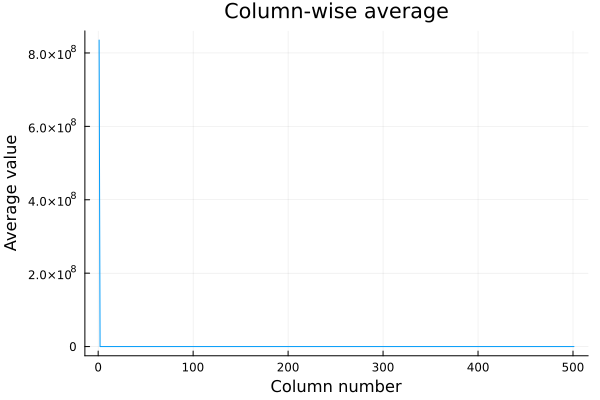

In [26]:


# Example array (remove this if you already have A)
# A = rand(10, 501)
A = wl.H_λN
# -------------------------
# 1. Average of columns vs column index
# -------------------------
col_avg = mean(A, dims=1)[:]      # size: 501
col_idx = 1:size(A, 2)

p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    title = "Column-wise average",
    legend = false
)

# -------------------------
# 2. Average of rows vs row index
# -------------------------
row_avg = mean(A, dims=2)[:]      # size: 10
row_idx = 1:size(A, 1)

p2 = plot(
    row_idx,
    row_avg,
    xlabel = "Row number",
    ylabel = "Average value",
    title = "Row-wise average",
    legend = false
)

# -------------------------
# 3. 3D plot: row, column → value
# -------------------------
rows = 1:size(A, 1)
cols = 1:size(A, 2)

p3 = surface(
    cols,
    rows,
    A,
    xlabel = "Column",
    ylabel = "Row",
    zlabel = "Value",
    title = "3D surface of A"
)

# -------------------------
# Display all three
# -------------------------
plot(p1)



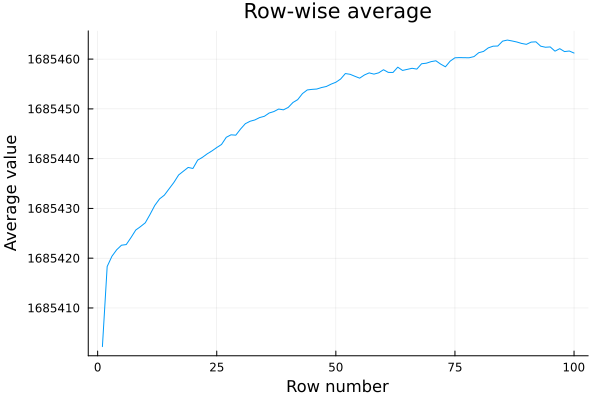

In [27]:
plot(p2)


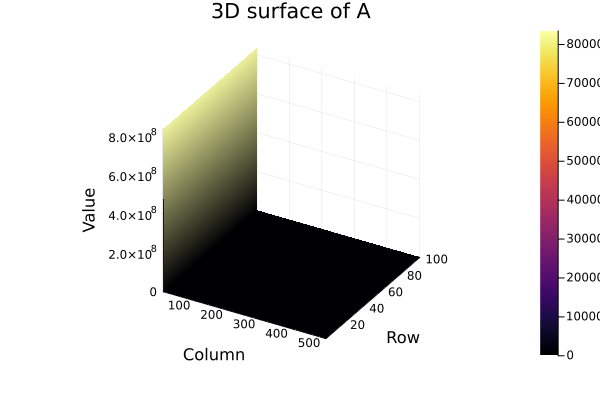

In [28]:
plot(p3)

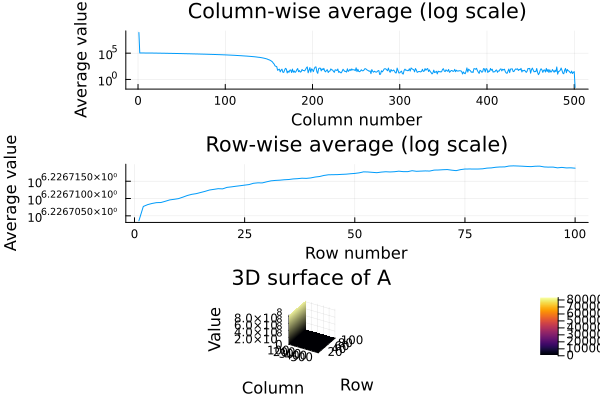

In [29]:
using Statistics
using Plots

# -------------------------
# Column averages (log y)
# -------------------------
col_avg = mean(A, dims=1)[:]
col_idx = 1:size(A, 2)

p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    yscale = :log10,
    title = "Column-wise average (log scale)",
    legend = false
)

# -------------------------
# Row averages (log y)
# -------------------------
row_avg = mean(A, dims=2)[:]
row_idx = 1:size(A, 1)

p2 = plot(
    row_idx,
    row_avg,
    xlabel = "Row number",
    ylabel = "Average value",
    yscale = :log10,
    title = "Row-wise average (log scale)",
    legend = false
)

# -------------------------
# 3D surface (linear)
# -------------------------
rows = 1:size(A, 1)
cols = 1:size(A, 2)

p3 = surface(
    cols,
    rows,
    A,
    xlabel = "Column",
    ylabel = "Row",
    zlabel = "Value",
    title = "3D surface of A"
)

plot(p1, p2, p3, layout = (3, 1))


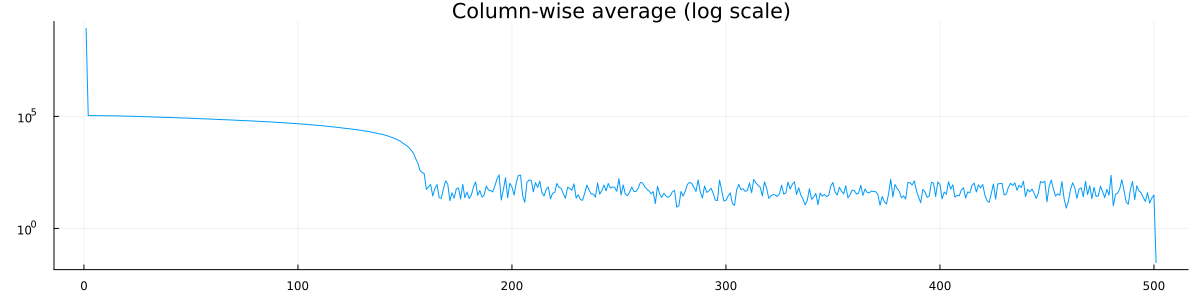

In [30]:
p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    yscale = :log10,
    # ylims = (0,1000),
    # xlims = (364,400),
    title = "Column-wise average (log scale)",
    legend = false, 
    # xticks = 360:1:400,
    size = (1200, 300)
)
plot(p1)

# Wow, one must wonder if it is because at the high densities it really is impossible to get particles in, lets try another run at λ=100